# 机器学习
---
<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="width: 30%;"/>

机器学习和统计建模关系密切，它们都涉及使用数据来描述和预测不确定过程或未知过程的结果。区别点在于，统计建模强调分析中使用的模型，机器学习则侧重于经过训练后用于预测新观察值输出的算法。

在机器学习中，数据的生成过程及内在的模型不是关注的重点，数据和解释变量是机器学习的基础。对于给定的数据，机器学习方法可以用于寻找数据中的模式和结构，然后用来预测新样本的输出。

由于机器学习不能理解数据是如何产生的，并且对于数据分布于及统计特性的前提假设较少。因此，在机器学习中，通常我们无法计算观察数据的统计量，以及对显著性进行建设检验。

本章中，我们将介绍和使用Python中最出名的机器学习库[scikit-learn](https://scikit-learn.org/stable/)。常见的机器学习库还包括TensorFlow、Keras、Pytorch等。

## 导入模块
---

本章将使用scikit-learn库，其中涉及到的子模块罗列如下：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
%reload_ext version_information
%version_information numpy, matplotlib, seaborn, sklearn

Software versions
Python 3.9.7 64bit [GCC 9.4.0]
IPython 8.0.0
OS Linux 5.10.84 10.3.al8.x86_64 x86_64 with glibc2.32
numpy 1.21.2
matplotlib 3.5.1
seaborn 0.11.2
sklearn 1.0.2
Fri Jun 17 14:21:41 2022 CST

## 机器学习
---

机器学习是人工智能领域的一个分支。我们在这里简要介绍一下相关的概念和术语：

在机器学习中，将模拟或算法拟合到观测数据的过程称之为**训练 Traning**。

机器学习的应用通常可以分为两类：**监督学习 Supervised Learning**和**无监督学习 Unsupervised Learning**。

在监督学习中，数据包括**特征变量 Feature Variable**和已知的**响应变量 Independent Variable**。特征变量和相应变量可以是连续的或者离散的。通常需要利用相关的专业知识人工准备这些数据。典型的应用包括**回归 Regression**（对连续响应变量进行预测）和**分类 Classification**（对离散响应变量进行预测）。在**训练集 Traning Set**中，响应变量的值是已知的。

无监督学习的应用是使用未标记或通过其它手动方式处理过的原始数据进行训练。无监督学习的典型应用是**聚类Clustering**（将数据分成合适的类别）。与监督学习相比，无监督学习的数据没有预先进行标记。这可能是由于样本数量太大，导致数据进行人工标记比较困难或者昂贵。显而易见，无监督学习更加困难，所受限制也较多。

**交叉验证 Cross Validation**是将可用的数据分为训练集和测试集。训练集用于训练机器学习模型，而测试集则可以让训练后的模型对新数据进行测试。这样做的目的是检验模型对于新样本的预测能力，以及防止**过拟合 Over Fitting**。

有多种方法可以划分数据集用于交叉验证。**穷举交叉验证 Exhausive Cross-Validation**是测试所有的可能组合，不适用于大数据集；**留一交叉验证 Leave-one-out Cross-Validation**是每轮训练选择一个数据用于测试。这种方法的变体是将数据集分为k组，然后使用其中一组用于交叉验证。在scikit-learn库中，`sklearn.model_selection`模块提供了用于交叉验证的方法。

**特征提取 Feature Extraction**是机器学习预处理截断的重要步骤，涉及创建合适的特征变量及对应的特征矩阵，这些特征矩阵可以传递给scikit-learn库中的某个机器学习算法。使用`sklearn.feature_extraction`模块可以从各种数据源中自动生成特征矩阵。

**降维 Dimensionality Reduction**和**特征选择 FeatureSelection**是机器学习中经常用到的方法。如果数据具有大量的解释变量（特征），但很多特征变量对于模型的预测能力影响很小。为了降低模型的复杂性，通常希望去除那些作用不太大的特征，从而减小问题的维度。scikit-learn库的`sklearn.decompositon`模块和`sklearn.feature_extraction`模块提供了各类降维方法。

在下面的内容中，我们将使用外部数据和scikit-learn库内置数据库进行机器学习的演示。

sklearn库的`dataset`模块提供了三组数据加载函数：加载内部数据集（以load为前缀）；导入外部数据集（以fetch为前缀）和生成随机数据（以make为前缀）。

## 回归
---

回归是统计建模和机器学习的核心内容。

在机器学习中，相对于回归模型与已有数据的拟合成都，我们更关心的是模型对新样本的预测准确度。

例如，如果有大量的特征数据和较少的观察样本，通常可以很完美地将回归模型拟合到数据，但这对于预测新数据没有什么作用，这就是典型地过拟合。

为了提升模型的泛化能力，需要将可用数据划分为训练数据集和测试数据集。

下面，我们来看一个拥有50个样本以及50个特征的回归问题，其中只有10个特征具有有用信息。

In [7]:
np.random.seed(123)

X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, 
                                        n_informative=10) #, noise=2.5)

X_all.shape, y_all.shape

((50, 50), (50,))

得到的结果是两个数组，对应特征矩阵和样本。

为了避免过拟合，我们使用`model_selection`模块的`train_test_split`函数将数据集等分为训练集和测试集。

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

X_train.shape, y_train.shape

((25, 50), (25,))

在sklearn中，可以使用`linear_model`模块的`LinearRegression`类来进行普通的线性回归。

In [9]:
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

`fit`方法会把结果直接保存在model实例中。

由于回归问题有50个特征，而训练数据只有25个样本，因此可以预期会发生过拟合。拟合程度可以通过模型与数据之间的误差平方和（SSE）来量化。

In [11]:
resid_train = y_train - model.predict(X_train)
sse_train = np.sum(resid_train**2)
sse_train

5.033216565235935e-25

可以看到，拟合后的模型对于训练集数据的残差基本为0，可以预期过拟合的模型不适用于新数据。

In [12]:
resid_test = y_test - model.predict(X_test)
sse_test = np.sum(resid_test**2)
sse_test

213555.61203039068

评估模型和数据拟合度的另一个方法是R-squared统计量。如果结果是 0，说明模型拟合效果很差；如果结果是 1，说明模型无错误。

In [13]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.3140740067520178)

最后，还可以使用图形方法对训练集和测试集的残差进行可视化。

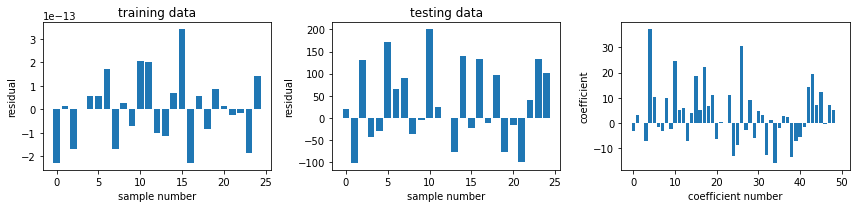

In [14]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

在这里例子中，过拟合的原因是样本数量太少。

### 正则化回归

解决过拟合问题的一个方案是**正则化回归 Regularized Regression**。

在普通线性回归中，可以通过选择模型参数来最小化残差的平方和。优化问题的目标函数为$\min_\beta \Vert X \beta-y \Vert^2_2$，其中$X$是特征举证，$y$是响应变量，$\beta$是模型参数向量。

在正则化回归中，我们在目标函数中增加了惩罚项，不同类型的惩罚项对原始回归问题进行不同的正则化。

最常见的正则化方法是在最小化目标函数中增加参数向量的L1范数和L2范数：$\min_\beta \left\{\Vert X \beta-y \Vert^2_2 + \alpha \Vert \beta \Vert_1  \right\}$和$\min_\beta \left\{\Vert X \beta-y \Vert^2_2 + \alpha \Vert \beta \Vert^2_2  \right\}$，这里$\alpha$是决定正则化强度的参数。它们分别被称为**LASSO回归**和**Ridge回归**。

增加L1范数可以让模型参数向量减少非零项目，从而消除部分特征；增加L2范数可以让模型参数向量更小。

在scikit-learn中，`linear_model`模块的`Ridge`类和`Lasso`类提供了相映的正则化回归方法。

In [15]:
model = linear_model.Ridge(alpha=5)
model.fit(X_train, y_train)

Ridge(alpha=5)

计算模型对训练集和数据集的SSE。

In [16]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

3292.962035869272

In [18]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

209557.58585055024

可以看到，训练集的SSE不再是接近0的值，而测试集的SSE略有减小。

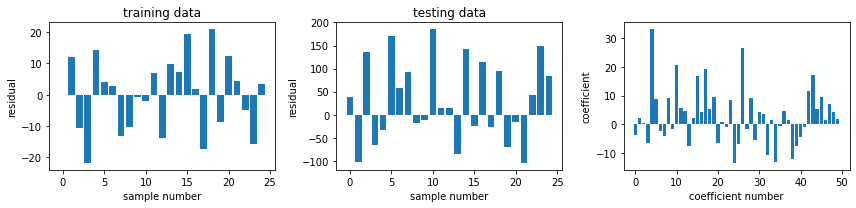

In [19]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

类型的，我们进行LASSO回归。在对实例进行初始化时，设置参数$\alpha=1.0$。

In [20]:
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)

Lasso()

In [22]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

309.7497138953248

In [23]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

1489.1176065002892

可以看到，虽然训练集的SSE稍有增加，测试集的SSE明显下降。

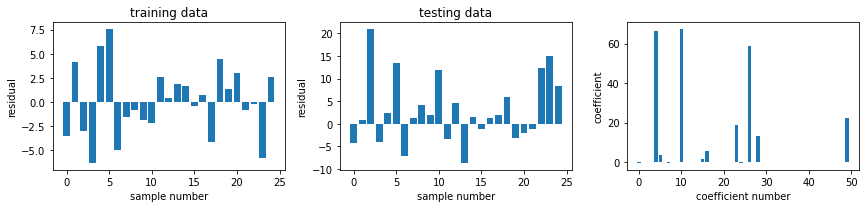

In [24]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

在最初生成数据集时，我们选择了50个特征，但是只有10个特征包含有用信息。对于包含大量无用特征的模型，LASSO回归是一种非常有效的方法。

### 正则化强度

针对每个新问题，可能需要反复实验才能找到合适的$\alpha$值。

In [25]:
alphas = np.logspace(-4, 2, 11)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

我们遍历数组中的$\alpha$值，并进行LASSO回归。

In [26]:
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.773e+01, tolerance: 3.303e+01
  model = cd_fast.enet_coordinate_descent(


对于较小的$\alpha$值，大量的系数都是非零的，这意味着过拟合。

当$\alpha$值增加到某个阈值之上后，大部分系数变成0，同时测试集的SSE开始急速下降。着就是LASSO回归的从众效应 Sought-After Effect。

但是当$\alpha$值太大时，所有系数都向0收敛，导致测试集和训练集的SSE开始上升。

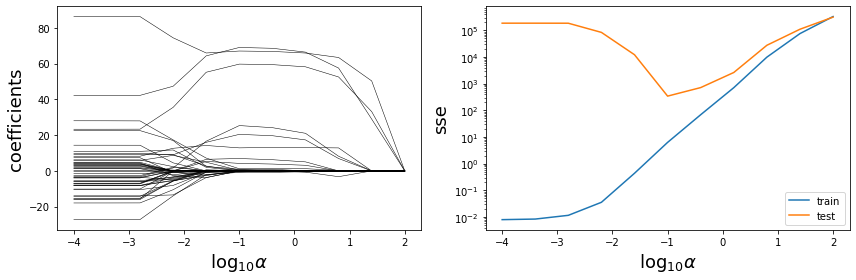

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()

我们可以使用`RidgeCV`和`LassoCV`类自动针对多个$\alpha$值测试正则化回归。它们能够在内部使用交叉验证的方法查找最优的$\alpha$值。

In [30]:
model = linear_model.LassoCV()
model.fit(X_all, y_all)

LassoCV()

可以通过alpha_属性查看为模型选择的正则化强度参数。

In [31]:
model.alpha_

0.06559238747534718

为了与之前的结果比较，我们重新计算训练集和测试集的SSE。

In [34]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

1.5450589323146804

In [37]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

1.5321417406216291

In [38]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9999953221722068, 0.9999950788657098)

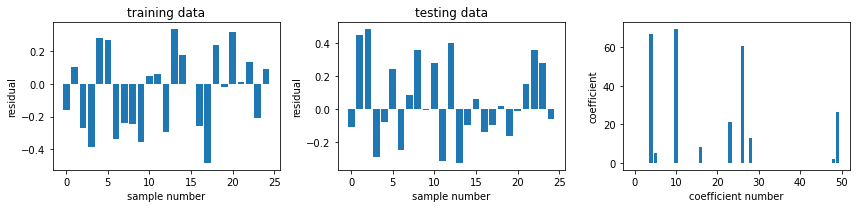

In [39]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

通过交叉验证的LASSO方法，我们获得了一个同时对训练集和测试集具有较高预测精度的模型，并且在样本数量少于特征数量的情况下解决了过拟合问题。

### Elastic-Net回归

Elastic-Net回归是结合了LASSO和Ridge回归中L1和L2范数的正则化回归模型。它的最小化目标函数是：
$$\min_\beta \left\{\Vert X \beta-y \Vert^2_2 + \alpha \rho \Vert \beta \Vert_1 +  \alpha (1 - \rho) \Vert \beta \Vert^2_2  \right\}$$
其中参数$\rho$是惩罚项的权重。

在scikit-learn中，ElasticNet类可以显式地设置参数$\alpha$和$\rho$，或者使用交叉验证的ElasticNetCV类自动寻找合适的参数值。

In [40]:
model = linear_model.ElasticNetCV()
model.fit(X_all, y_all)

ElasticNetCV()

In [41]:
model.alpha_, model.l1_ratio

(0.13118477495069433, 0.5)

In [42]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

2183.8391729391287

In [43]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

2650.0504463382463

In [44]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9933881981034111, 0.9914882195448783)

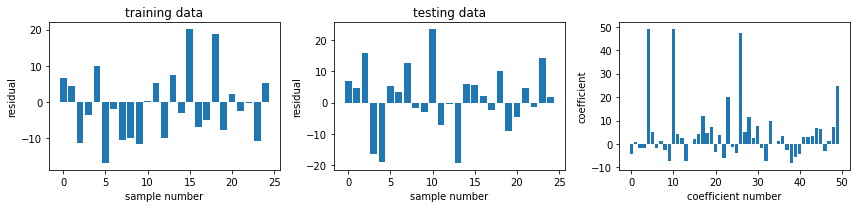

In [45]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

## 分类
---

机器学习中有多种分类算法，例如最近邻算法 Nearest Neighbor Method、支持向量机 Support Vector Machine、决策树 Decision Tree、随机森林算法 Random Forest Method等。scikit-learn库为这些算法提供了方便的API。

为了演示如何使用数据集对分类模型进行训练和测试，我们将使用经典的Iris数据集。该数据集包含鸢尾花样本的花萼和花瓣的结构特征和品种信息。

In [3]:
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

通过`target_names`和`feature_names`属性查看分类名称和特征。

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

实际的数据集可以通过`data`和`target`属性获得。

In [129]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

我们首先使用`model_selection`模块的`train_test_split`方法将数据集拆分为训练集和测试集。

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

下一步是创建分类器实例，这里我们选择对数几率回归分类器。

In [9]:
classifier = linear_model.LogisticRegression()

调用分类器的`fit`方法对模型进行训练。`fit`方法的参数是特征矩阵和目标向量。

In [10]:
classifier.fit(X_train, y_train)

LogisticRegression()

训练完成之后，使用训练器实例的`predict`方法来预测新样本的类别，并于实际值进行对比。

In [12]:
y_test_pred = classifier.predict(X_test)

In [14]:
y_test_pred

array([0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0,
       2])

`metrics`模块提供了用于评估分类器性能和准确性的函数。

In [15]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      0.91      0.87        11
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45



为了统计分类的准确率，还可以使用`confusion_matrix`方法计算所谓的混淆矩阵，矩阵对角线上的值是正确分类的样本数，非对角线上的值代表分类的错误样本数目。

In [16]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 14]])

这里看到第二类的一个样本被错误地划分到了第三类。

如果要使用其它的分类器进行分类，只需要创建相应的实例。

In [17]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0,  9,  2],
       [ 0,  1, 15]])

In [18]:
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 11,  0],
       [ 0,  3, 13]])

In [19]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 14]])

In [20]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 15]])

下面，我们将准备不同比例的训练集和测试集，测试和比较上述不同分类器的性能。

In [22]:
train_size_vec = np.linspace(0.1, 0.9, 30)

classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [23]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

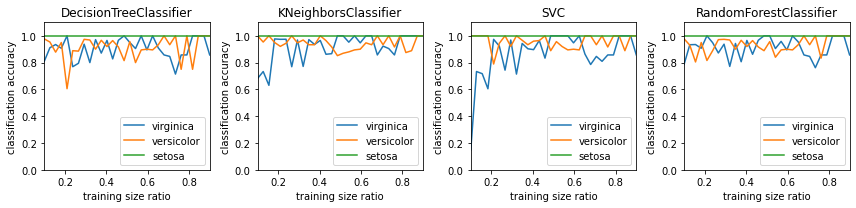

In [24]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()

可以看到，每个模型的分类错误是不同的。针对特定问题，可能需要尝试不同的分类器。

## 聚类
---

聚类是类别未知的分类问题，它是无监督学习的典型应用。聚类算法的训练数据集仅包含特征变量，模型的输出是一个整数数组，代表为每个样本赋予的类别序号。

scikit-learn库的`cluster`模块实现了多种聚类算法，例如k均值算法`KMeans`、mean-shift算法`MeanShift`等。很多聚类算法需要把簇的数量作为输入参数，可以在创建类实例时通过n_cluster参数来设置。

这里，我们依旧使用Iris数据集来演示聚类算法。

In [25]:
X, y = iris.data, iris.target

为了使用k均值算法，需要设置聚类的数目。通常情况下，需要尝试使用几个不同的聚类数量。

In [28]:
n_clusters = 3
c = cluster.KMeans(n_clusters=n_clusters)

为了进行计算，我们调用聚合器的`fit`方法，这里只需要将特征矩阵作为参数输入。

In [29]:
c.fit(X)
y_pred = c.predict(X)
y_pred 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [30]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

得到的结果是一个与训练集大小相同的整数数组，元素值代表分类组号。

In [166]:
y_pred[::4]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

可以对聚类的结果与监督分类的结果进行比较：

In [167]:
y[::4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

可以看到，二者的输出结果中类别的数字不同。为了对二者的指标进行比较，需要对数组的元素进行重命名。

In [31]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 1, 0, 2
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [33]:
np.sum(y_pred == y)

134

现在我们可以使用`confusion_matrix`方法比较监督分类和无监督分类的差别：

In [169]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

聚类算法可以正确识别第一类的样本，但是第二类有2个样本被划分到了第三类，第三类有14个样本被划分为了第二类。

下面我们将对聚类的结果进行可视化。我们将遍历每个特征对以及每个聚类，并使用红色方框标记与监督分类结果不一致的样本。

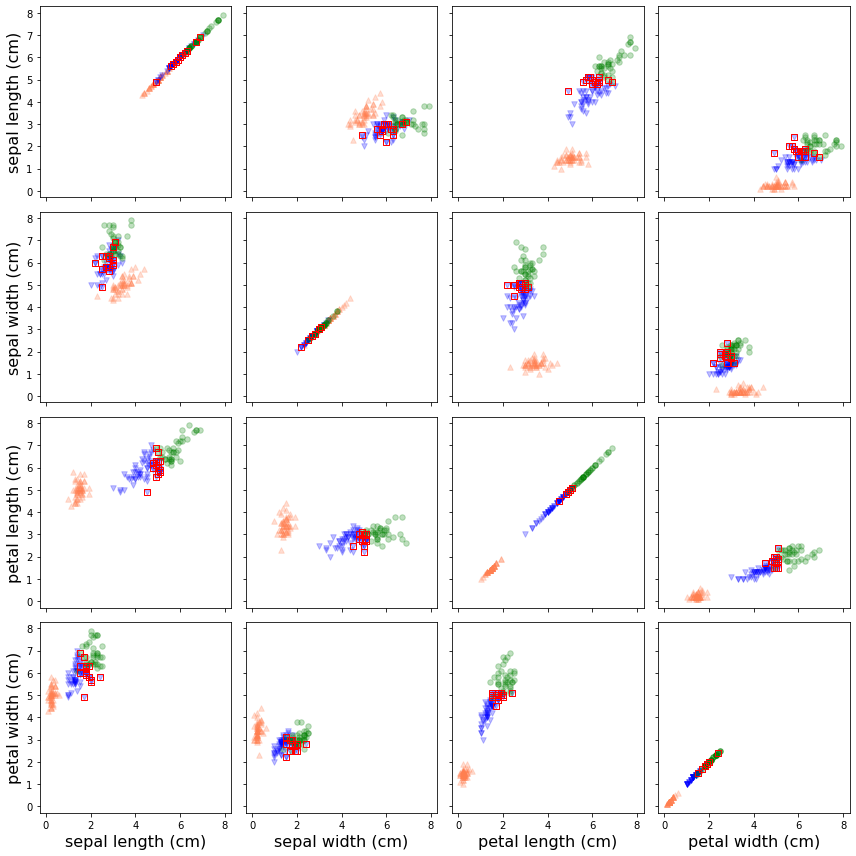

In [34]:
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))

    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()

我们不能期望无监督聚类算法能够完美分类数据集。